In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel
from xgboost import XGBClassifier, plot_importance

In [3]:
df = pd.read_excel(r'''C:\Users\Administrator\Downloads\2010 Federal STEM Education Inventory Data Set.xls''', header = 1)
df = df.drop(index = 252)
df['C1) Funding FY2008'] = df['C1) Funding FY2008'].fillna(0)
df['C2) Funding FY2009'] = df['C2) Funding FY2009'].fillna(0)
df['%growth'] = (df['C2) Funding FY2009'] - df['C1) Funding FY2008']) / df['C1) Funding FY2008']
df['target'] = np.where(df['%growth'] >= 0, 1, 0)
df.head()

,Index Number,Investment Name,Agency,Subagency,A) Brief Description,B) Year Established,C1) Funding FY2008,C2) Funding FY2009,C3) Funding FY2010,D) Mission-specific or General STEM?,...,Y3) Process or Implementation Evaluation Type,Unnamed: 249,Unnamed: 250,Y4) Portfolio Evaluation/Review Type,Unnamed: 252,Unnamed: 253,Y5) Expert Review Type,Unnamed: 255,%growth,target
0,PRG_0001,Centers for Ocean Sciences Education Excellence ~,National Science Foundation,Directorate for Geosciences (GEO),The Division of Ocean Sciences seeks to establ...,2002.0,5.24,7.19,5.70,General STEM,...,NaN,NaN,NO,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN,0.372137,1
1,PRG_0002,Broadening Participation in Computing (BPC),National Science Foundation,Directorate for Computer & Information Science...,The BPC Program was not primarily aimed at edu...,2006.0,14.00,14.00,14.00,General STEM,...,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN,0.000000,1
2,PRG_0003,CISE Pathways to Revitalized Undergraduate Com...,National Science Foundation,Directorate for Computer & Information Science...,Through the CISE Pathways to Revitalized Under...,2007.0,5.00,5.00,4.37,General STEM,...,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN,0.000000,1
3,PRG_0004,Opportunities for Enhancing Diversity in the G...,National Science Foundation,Directorate for Geosciences (GEO),The Opportunities for Enhancing Diversity in t...,2002.0,4.57,11.79,4.18,General STEM,...,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN,1.579869,1
4,PRG_0005,Geoscience Education,National Science Foundation,Directorate for Geosciences (GEO),The Geoscience Education (GeoEd) program is fo...,1999.0,1.63,2.74,2.02,General STEM,...,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN,0.680982,1


In [4]:
X = df.drop(columns = {'Index Number', 'Investment Name', 'A) Brief Description', 'C1) Funding FY2008','C2) Funding FY2009', 'C3) Funding FY2010', '%growth', 'target'})
y = df["target"]

In [5]:
#changing categorical variables into numeric values
for i in X.columns: 
    if X[i].dtype == 'object': 
        lbl = LabelEncoder() 
        lbl.fit(list(X[i].values)) 
        X[i] = lbl.transform(list(X[i].values))
X.fillna(0, inplace=True) 
X = X.astype(float)
X.shape

(252, 250)

In [6]:
#train data and apply XGBoost model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [7]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("ROC_AUC_score : %.6f" % (roc_auc_score(y_test, predictions)))

Accuracy: 77.63%
ROC_AUC_score : 0.605263


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


##  Applying feature selection methods

### Univariate feature selection

In [8]:
X1 = X

In [9]:
for i in X1.columns: 
    if X1[i].dtype == 'object': 
        lbl = LabelEncoder() 
        lbl.fit(list(X1[i].values)) 
        X1[i] = lbl.transform(list(X1[i].values))
X1.fillna(0, inplace=True) 
X1 = X1.astype(float)

In [10]:
X1_new = SelectKBest(chi2, k=30).fit_transform(X1, y)
X1_new.shape

(252, 30)

In [11]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_new, y, test_size = 0.30, random_state = 0)
model = XGBClassifier()
model.fit(X1_train, y1_train)
y1_pred = model.predict(X1_test)
predictions = [round(value) for value in y1_pred]
accuracy = accuracy_score(y1_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("ROC_AUC_score : %.6f" % (roc_auc_score(y1_test, predictions)))

Accuracy: 78.95%
ROC_AUC_score : 0.649123


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### PCA

In [12]:
X3 = X
for i in X3.columns: 
    if X3[i].dtype == 'object': 
        lbl = LabelEncoder() 
        lbl.fit(list(X3[i].values)) 
        X3[i] = lbl.transform(list(X3[i].values))
X3.fillna(0, inplace=True) 
X3 = X3.astype(float)

In [16]:
X3 = StandardScaler().fit_transform(X3)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X3)

In [17]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['PCA_comp_1', 'PCA_comp_2'])
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf.head()

,PCA_comp_1,PCA_comp_2,target
0,6.004952,-1.229289,1
1,2.999130,2.055753,1
2,3.143649,-0.704283,1
3,11.799867,3.642280,1
4,8.741898,1.601919,1


In [18]:
X4 = finalDf.drop(columns = 'target')
y4 = finalDf['target']
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size = 0.30, random_state = 0)
model = XGBClassifier()
model.fit(X4_train, y4_train)
y4_pred = model.predict(X4_test)
predictions = [round(value) for value in y4_pred]
accuracy = accuracy_score(y4_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("ROC_AUC_score : %.6f" % (roc_auc_score(y4_test, predictions)))

Accuracy: 75.00%
ROC_AUC_score : 0.517544


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### Feature Importance XGBoost

In [21]:
X5 = X
for i in X5.columns: 
    if X5[i].dtype == 'object': 
        lbl = LabelEncoder() 
        lbl.fit(list(X5[i].values)) 
        X5[i] = lbl.transform(list(X5[i].values))
X5.fillna(0, inplace=True) 
X5 = X5.astype(float)

In [22]:
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y, test_size = 0.30, random_state = 0)
model = XGBClassifier()
model.fit(X5, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

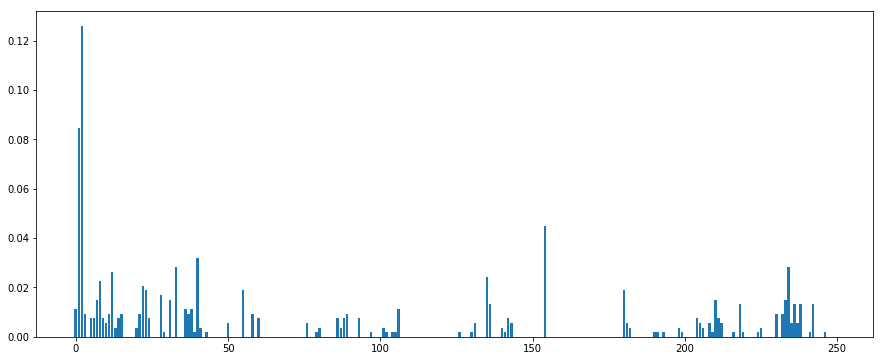

In [23]:
plt.figure(figsize = [15,6])
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

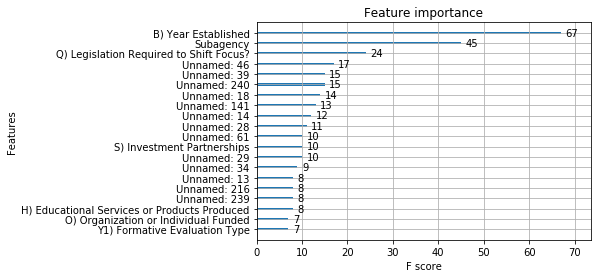

In [24]:
plot_importance(model, max_num_features=20)
plt.show()

In [25]:
selection = SelectFromModel(model, prefit=True)
select_X5_train = selection.transform(X5_train)
selection_model = XGBClassifier()
selection_model.fit(select_X5_train, y5_train)
# eval model
select_X5_test = selection.transform(X5_test)
y5_pred = selection_model.predict(select_X5_test)
predictions = [round(value) for value in y5_pred]
accuracy = accuracy_score(y5_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 78.95%


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [26]:
imp = pd.Series(model.feature_importances_, index = X5.columns)
imp = imp.loc[imp >= 0.0075]
len(imp)

48

In [27]:
X6 = X5[imp.index]

In [28]:
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y, test_size = 0.30, random_state = 0)
model1 = XGBClassifier()
model1.fit(X6_train, y6_train)
y6_pred = model1.predict(X6_test)
predictions = [round(value) for value in y6_pred]
accuracy = accuracy_score(y6_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("ROC_AUC_score : %.6f" % (roc_auc_score(y6_test, predictions)))

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy: 80.26%
ROC_AUC_score : 0.657895


## Trying another way

In [29]:
#Regenerating headers
header = pd.read_excel(r'''C:\Users\Administrator\Downloads\2010 Federal STEM Education Inventory Data Set.xls''', index = [0],
                       header=None).iloc[1:2, 1:].ffill(axis=1)
header.head()

,1,2,3,4,5,6,7,8,9,10,...,246,247,248,249,250,251,252,253,254,255
1,Investment Name,Agency,Subagency,A) Brief Description,B) Year Established,C1) Funding FY2008,C2) Funding FY2009,C3) Funding FY2010,D) Mission-specific or General STEM?,E) Agency or Mission-Related Workforce Needs?,...,Y2) Summative Evaluation Type,Y2) Summative Evaluation Type,Y3) Process or Implementation Evaluation Type,Y3) Process or Implementation Evaluation Type,Y3) Process or Implementation Evaluation Type,Y4) Portfolio Evaluation/Review Type,Y4) Portfolio Evaluation/Review Type,Y4) Portfolio Evaluation/Review Type,Y5) Expert Review Type,Y5) Expert Review Type


In [30]:
df1 = df.copy()
for i in df1.columns: 
    if df1[i].dtype == 'object': 
        lbl = LabelEncoder() 
        lbl.fit(list(df1[i].values)) 
        df1[i] = lbl.transform(list(df1[i].values))
df1.fillna(0, inplace=True) 
df1 = df1.astype(float)
df1 = df1.drop(columns = {'Index Number', '%growth', 'target'})
df1.columns = list(header.iloc[0])
df1.head()

,Investment Name,Agency,Subagency,A) Brief Description,B) Year Established,C1) Funding FY2008,C2) Funding FY2009,C3) Funding FY2010,D) Mission-specific or General STEM?,E) Agency or Mission-Related Workforce Needs?,...,Y2) Summative Evaluation Type,Y2) Summative Evaluation Type,Y3) Process or Implementation Evaluation Type,Y3) Process or Implementation Evaluation Type,Y3) Process or Implementation Evaluation Type,Y4) Portfolio Evaluation/Review Type,Y4) Portfolio Evaluation/Review Type,Y4) Portfolio Evaluation/Review Type,Y5) Expert Review Type,Y5) Expert Review Type
0,31.0,10.0,12.0,92.0,2002.0,5.24,7.19,5.70,1.0,2.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
1,23.0,10.0,9.0,76.0,2006.0,14.00,14.00,14.00,1.0,2.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
2,26.0,10.0,9.0,240.0,2007.0,5.00,5.00,4.37,1.0,2.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
3,174.0,10.0,12.0,163.0,2002.0,4.57,11.79,4.18,1.0,2.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
4,72.0,10.0,12.0,107.0,1999.0,1.63,2.74,2.02,1.0,2.0,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0


In [31]:
X10 = df1.T
X10.index.name = 'A'
X10 = X10.pivot_table(index = 'A', aggfunc = sum)
X10 = X10.T
X10 = X10.drop(columns = {'Investment Name', 'A) Brief Description', 'C1) Funding FY2008','C2) Funding FY2009', 'C3) Funding FY2010'})
X10.head()

A,Agency,B) Year Established,D) Mission-specific or General STEM?,E) Agency or Mission-Related Workforce Needs?,F1) Primary Investment Objective,F2) Secondary Investment Objectives,G1) Primary Research Approaches,G2) Secondary Research Approaches,G3) Research Approaches Not Used,H) Educational Services or Products Produced,...,T) Partnerships with What Organization Types?,U) Measured Outputs,V) Outcomes Measured,W) Measurement Instruments Used,X) Evaluated Since 2005?,Y1) Formative Evaluation Type,Y2) Summative Evaluation Type,Y3) Process or Implementation Evaluation Type,Y4) Portfolio Evaluation/Review Type,Y5) Expert Review Type
0,10.0,2002.0,1.0,2.0,2.0,12.0,3.0,5.0,2.0,44.0,...,35.0,25.0,44.0,12.0,1.0,3.0,2.0,2.0,2.0,1.0
1,10.0,2006.0,1.0,2.0,1.0,36.0,5.0,3.0,2.0,42.0,...,32.0,32.0,55.0,116.0,1.0,5.0,2.0,2.0,2.0,2.0
2,10.0,2007.0,1.0,2.0,2.0,38.0,2.0,3.0,5.0,53.0,...,34.0,95.0,63.0,110.0,1.0,3.0,2.0,2.0,2.0,2.0
3,10.0,2002.0,1.0,2.0,1.0,34.0,4.0,3.0,3.0,46.0,...,31.0,93.0,18.0,73.0,1.0,2.0,2.0,2.0,2.0,1.0
4,10.0,1999.0,1.0,2.0,3.0,34.0,4.0,3.0,3.0,45.0,...,14.0,101.0,63.0,76.0,1.0,2.0,2.0,2.0,2.0,2.0


### Univariate feature selection

In [32]:
X10_new = SelectKBest(chi2, k=30).fit_transform(X10, y)
X10_new.shape

(252, 30)

In [33]:
X11_train, X11_test, y11_train, y11_test = train_test_split(X10_new, y, test_size = 0.30, random_state = 0)
model = XGBClassifier()
model.fit(X11_train, y11_train)
y11_pred = model.predict(X11_test)
predictions = [round(value) for value in y11_pred]
accuracy = accuracy_score(y11_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("ROC_AUC_score : %.6f" % (roc_auc_score(y11_test, predictions)))

Accuracy: 71.05%
ROC_AUC_score : 0.543860


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### Feature Importance XGBoost

In [34]:
X12 = X10
for i in X12.columns: 
    if X12[i].dtype == 'object': 
        lbl = LabelEncoder() 
        lbl.fit(list(X12[i].values)) 
        X12[i] = lbl.transform(list(X12[i].values))
X12.fillna(0, inplace=True) 
X12 = X12.astype(float)

In [35]:
X12_train, X12_test, y12_train, y12_test = train_test_split(X12, y, test_size = 0.30, random_state = 0)
model = XGBClassifier()
model.fit(X12, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

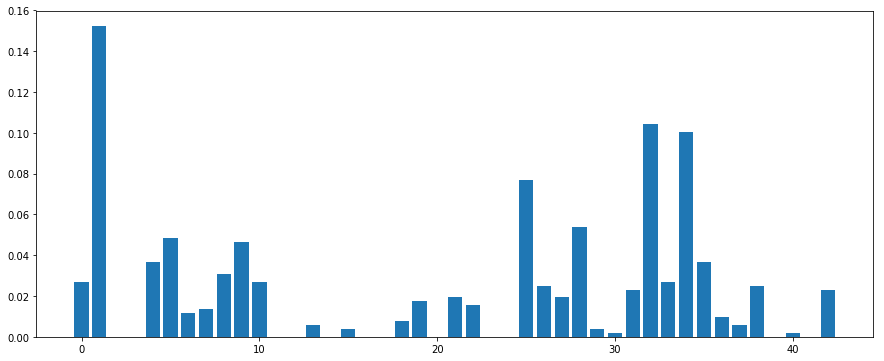

In [36]:
plt.figure(figsize = [15,6])
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

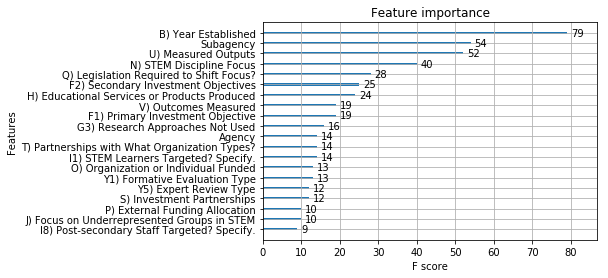

In [37]:
plot_importance(model, max_num_features=20)
plt.show()

In [49]:
selection = SelectFromModel(model, prefit=True)
select_X12_train = selection.transform(X12_train)
selection_model = XGBClassifier()
selection_model.fit(select_X12_train, y12_train)
# eval model
select_X12_test = selection.transform(X12_test)
y12_pred = selection_model.predict(select_X12_test)
predictions = [round(value) for value in y12_pred]
accuracy = accuracy_score(y12_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.63%


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [68]:
imp1 = pd.Series(model.feature_importances_, index = X12.columns)
imp1 = imp1[imp1 > 0.0]
imp1.sort_values(ascending = False)
len(imp1)

31

In [69]:
imp1 = imp1.loc[imp1 >= 0.0075]
len(imp1)

25

In [70]:
X13 = X12[imp1.index]

In [71]:
X13_train, X13_test, y13_train, y13_test = train_test_split(X13, y, test_size = 0.30, random_state = 0)
model1 = XGBClassifier()
model1.fit(X13_train, y13_train)
y13_pred = model1.predict(X13_test)
predictions = [round(value) for value in y13_pred]
accuracy = accuracy_score(y13_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("ROC_AUC_score : %.6f" % (roc_auc_score(y13_test, predictions)))

Accuracy: 77.63%
ROC_AUC_score : 0.622807


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thus, the best accuracy achieved was using feature importance XGBoost method with accuracy of 80.26% and roc-auc_score of 0.65.